<h1>Стратегия удержания клиентов в сети фитнес-центров<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Стратегия-удержания-клиентов-в-сети-фитнес-центров" data-toc-modified-id="Стратегия-удержания-клиентов-в-сети-фитнес-центров-1">Стратегия удержания клиентов в сети фитнес-центров</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.1">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-пропусков,-средних-значений,-стандартных-отклонений" data-toc-modified-id="Анализ-пропусков,-средних-значений,-стандартных-отклонений-1.1.1">Анализ пропусков, средних значений, стандартных отклонений</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.1.1">Вывод</a></span></li></ul></li><li><span><a href="#Анализ--пользователей-по-признаку-оттока" data-toc-modified-id="Анализ--пользователей-по-признаку-оттока-1.1.2">Анализ  пользователей по признаку оттока</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1.2.1">Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-1.2">Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2.1">Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-1.3">Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3.1">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-1.4">Общий вывод</a></span></li></ul></li></ul></div>

**Описание ситуации**  
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал.   

**Задача.**  
Провести анализ и подготовить план действий по удержанию клиентов:
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.  
    
**Описание данных.**  
«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 

Набор данных включает следующие поля:   
'Churn' — факт оттока в текущем месяце;  

Текущие поля в датасете:  
*Данные клиента за предыдущий до проверки факта оттока месяц:*  
'gender' — пол;  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
'Phone' — наличие контактного телефона;  
'Age' — возраст;  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*   
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);    
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
'Group_visits' — факт посещения групповых занятий;  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  

Исследование включает в себя следующие **этапы:**  
- Загрузка данных.
- Исследовательский анализ данных (EDA).
- Постройка модели прогнозирования оттока пользователей.
- Кластеризация пользователей.
- Формулирование выводов.

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import re
import requests
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import string
import matplotlib.patches as mpatches
from io import BytesIO

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage 



In [2]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 1000)

In [3]:
sns.set_palette('dark') 

## Исследовательский анализ данных

In [4]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [5]:
gym.shape

(4000, 14)

In [6]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0


### Анализ пропусков, средних значений, стандартных отклонений

Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [8]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


In [9]:
gym.isna().mean()

gender                              0.00
Near_Location                       0.00
Partner                             0.00
Promo_friends                       0.00
Phone                               0.00
Contract_period                     0.00
Group_visits                        0.00
Age                                 0.00
Avg_additional_charges_total        0.00
Month_to_end_contract               0.00
Lifetime                            0.00
Avg_class_frequency_total           0.00
Avg_class_frequency_current_month   0.00
Churn                               0.00
dtype: float64

Пропусков в датасете нет. Предобработка не требуется.

In [10]:
gym.duplicated().sum()

0

Полных дубликатов в датасете нет. Предобработка не требуется.

Приведем наименования колонок к нижнему регистру.

In [11]:
gym.columns = gym.columns.str.lower()
gym.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

Изменим тип данных столбца month_to_end_contract на целочисленный.

In [12]:
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype(int)

Рассмотрим уникальные значения столбцов.

In [13]:
for i in gym.columns:
    print(i)
    print(gym[i].sort_values(ascending = True).unique())
    print('_'*80)

gender
[0 1]
________________________________________________________________________________
near_location
[0 1]
________________________________________________________________________________
partner
[0 1]
________________________________________________________________________________
promo_friends
[0 1]
________________________________________________________________________________
phone
[0 1]
________________________________________________________________________________
contract_period
[ 1  6 12]
________________________________________________________________________________
group_visits
[0 1]
________________________________________________________________________________
age
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 41]
________________________________________________________________________________
avg_additional_charges_total
[1.48204788e-01 1.71862303e-01 2.51605722e-01 ... 5.15392606e+02
 5.34256182e+02 5.52590740e+02]
__________________________

#### Вывод
Датасет состоит из 14 колонок (признаки) и 4000 строк (пользователи). Наименования столбцов приведены к нижнему регистру. Изменен тип данных в столбце month_to_end_contract на целочисленный. Пропуски и дубликаты в датасете отсутствуют. Аномальных значений нет.  

### Анализ  пользователей по признаку оттока

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [14]:
gym_churn = gym['churn'].value_counts().reset_index()
gym_churn = gym_churn.rename(columns={'index' : 'gone/stayed', 'churn':'count'})
gym_churn['ratio'] = gym_churn['count'] / gym_churn['count'].sum()
display(gym_churn.style.format({'ratio':"{0:.1%}"}))

,gone/stayed,count,ratio
0,0,2939,73.5%
1,1,1061,26.5%


Общее количество пользователей - 4000, из них 1061 (26.5%) перестали посещать фитнес-клуб.

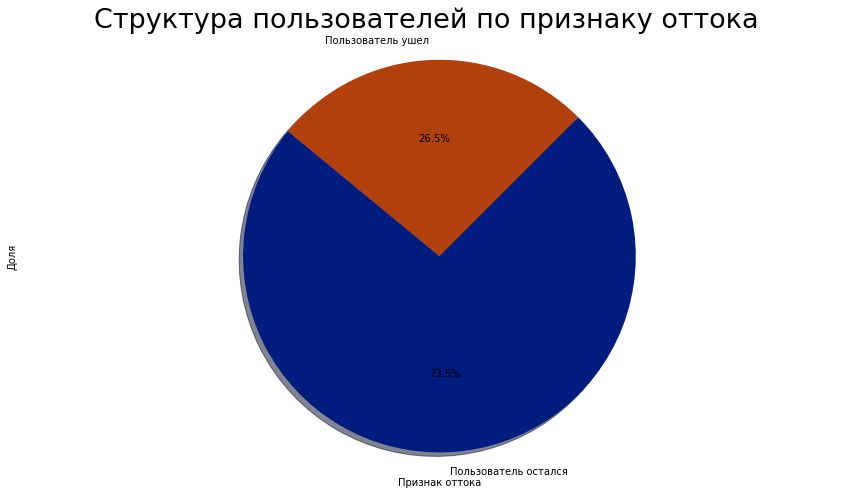

In [15]:
fig, axs = plt.subplots(figsize=(15, 8))
#explode = [0.07, 0.07, 0.07, 0, 0, 0, 0, 0, 0]
gym_churn['count'].plot(
    kind='pie',
    #explode=explode,
    startangle=45,
    labels = ['Пользователь остался', 'Пользователь ушел'],
    #labeldistance = 1.1,
    autopct='%1.1f%%',
    shadow=True, 
    counterclock = False,
    #frame = True,
    #rotatelabels = True
)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.xlabel('Признак оттока')
plt.ylabel('Доля')
plt.figtext(.5,.9,'Структура пользователей по признаку оттока', fontsize=27, ha='center')
plt.show()

In [16]:
gym_churn_mean = gym.groupby('churn').agg({'mean'}).T\
   .rename(columns={0 : 'client_stayed', 1 : 'client_gone'})
gym_churn_mean['ratio'] = gym_churn_mean['client_gone'] / gym_churn_mean['client_stayed'] - 1
gym_churn_mean = gym_churn_mean.sort_values(by='ratio', ascending = False)

display(gym_churn_mean.style.format({'ratio':"{0:.0%}"}))

,churn,client_stayed,client_gone,ratio
gender,mean,0.510037,0.510839,0%
phone,mean,0.903709,0.902922,-0%
age,mean,29.9765,26.9896,-10%
near_location,mean,0.873086,0.768143,-12%
avg_class_frequency_total,mean,2.02488,1.47499,-27%
avg_additional_charges_total,mean,158.446,115.083,-27%
partner,mean,0.534195,0.355325,-33%
group_visits,mean,0.464103,0.268615,-42%
promo_friends,mean,0.353522,0.183789,-48%
avg_class_frequency_current_month,mean,2.02788,1.04455,-48%


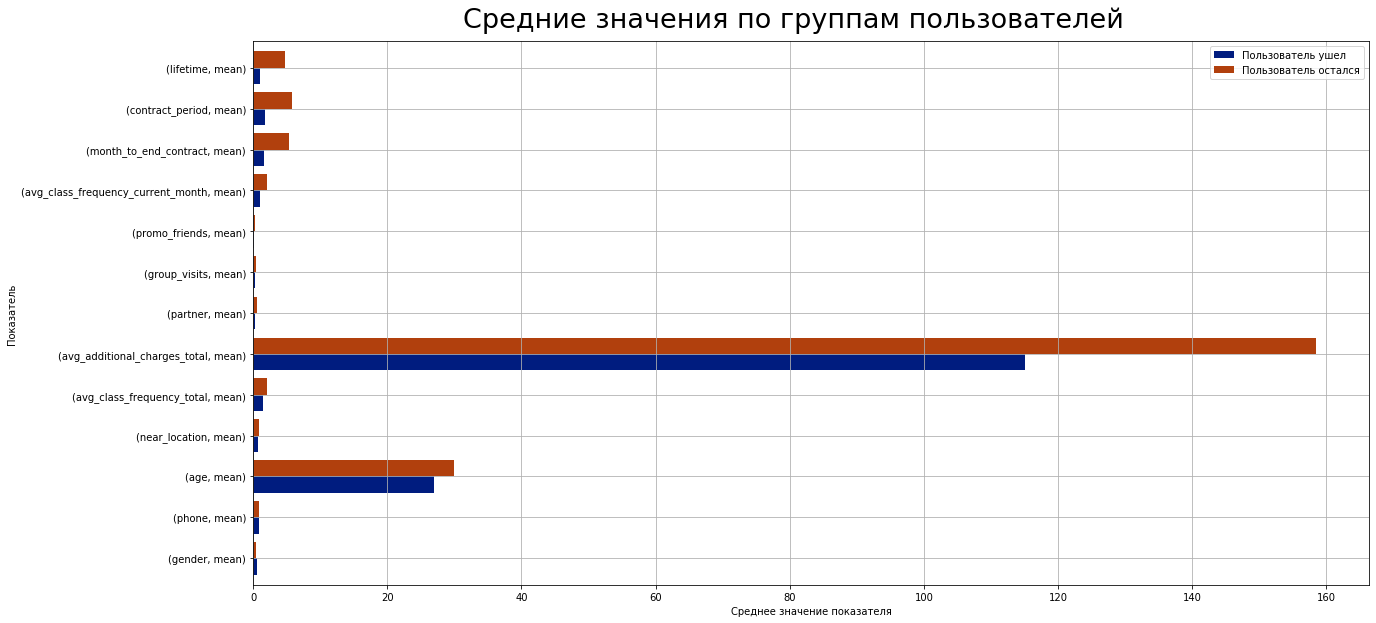

In [17]:
gym_churn_mean.plot(
    kind = 'barh', 
    width=0.8,
    figsize = (20,10), 
    grid = True,
    y=['client_gone', 'client_stayed'],
    label=['Пользователь ушел', 'Пользователь остался'],
    rot=0)# <задаем параметр rot=0 для того, чтобы подписи оси х не были перевернуты>
plt.xlabel('Среднее значение показателя')
plt.ylabel('Показатель')
plt.figtext(.5,.9,'Средние значения по группам пользователей', fontsize=27, ha='center')
plt.show()


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).


In [18]:
columns = list(gym.columns)
columns.remove('churn')
columns

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

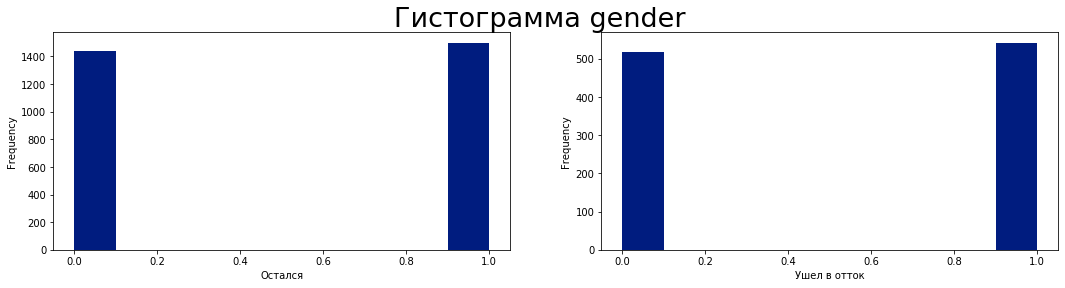

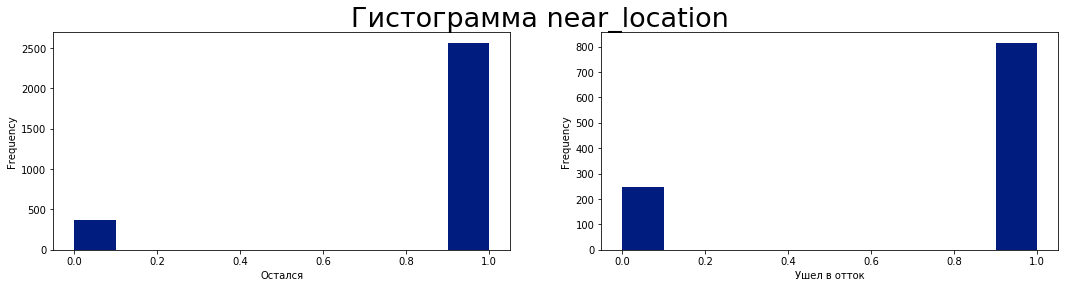

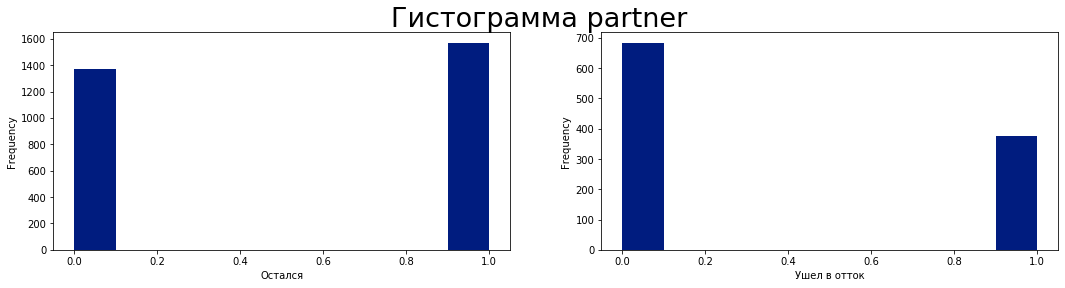

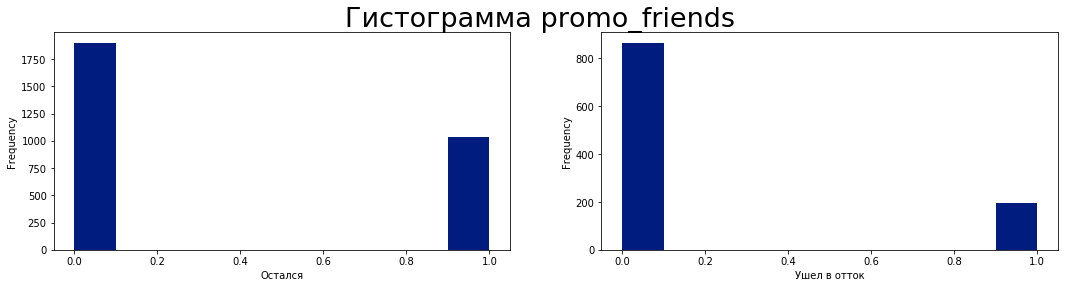

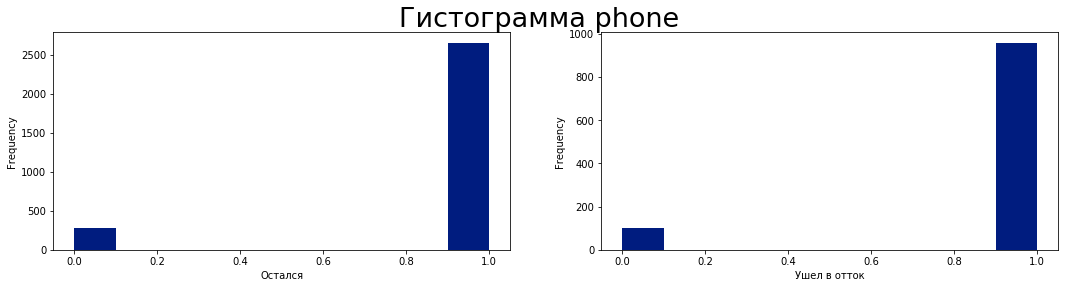

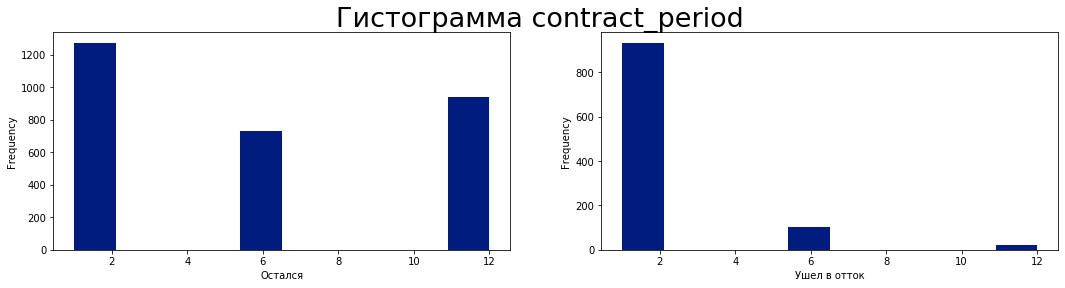

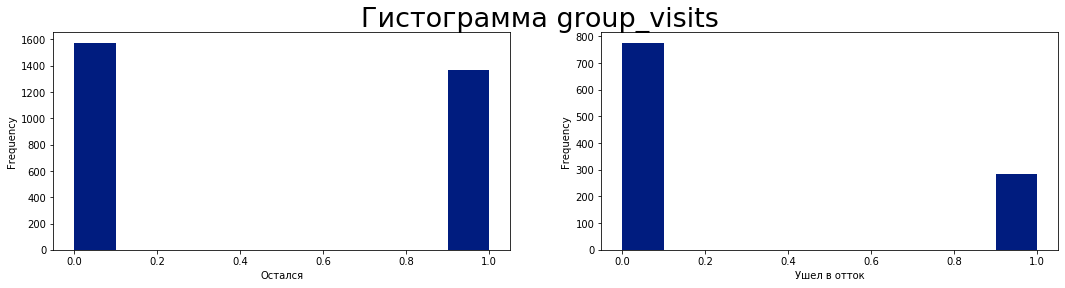

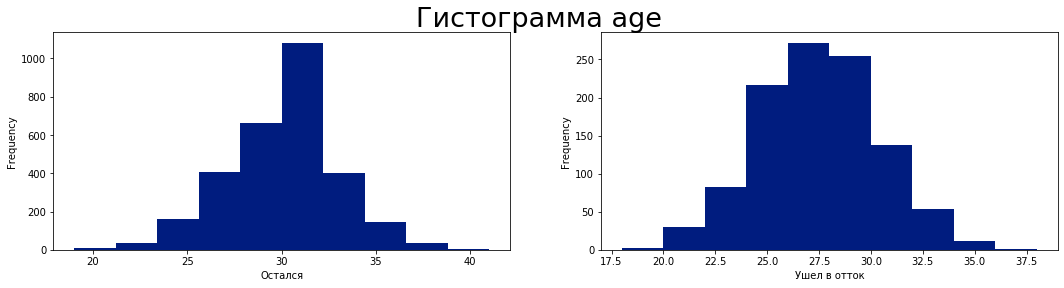

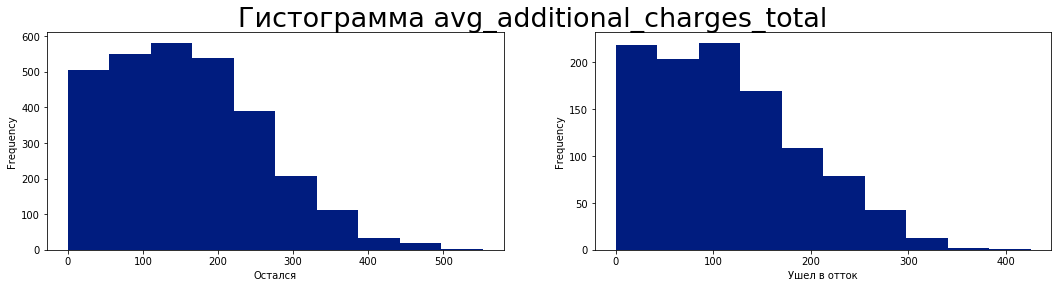

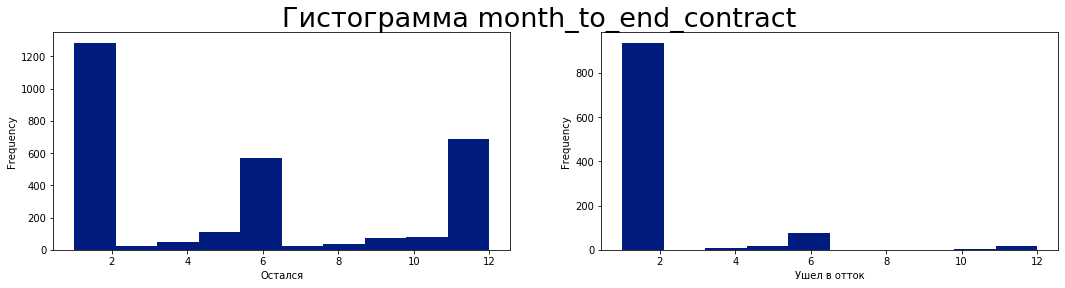

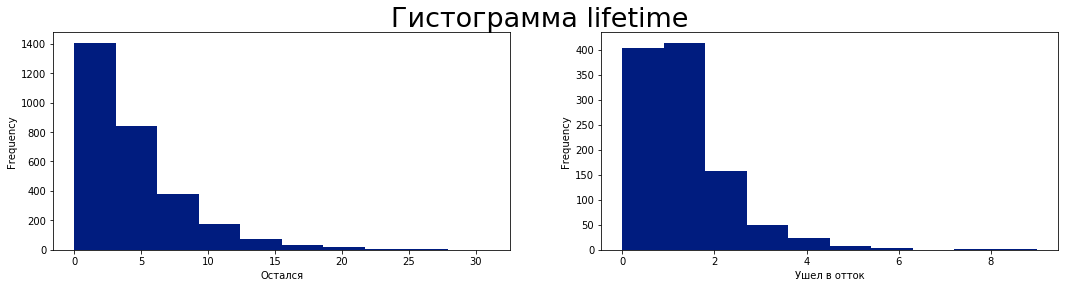

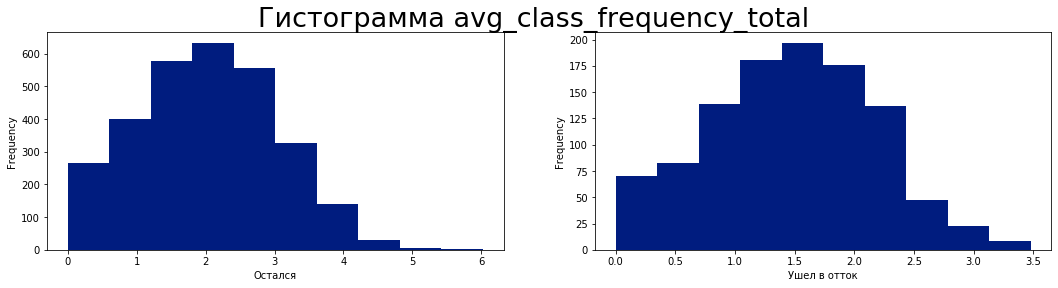

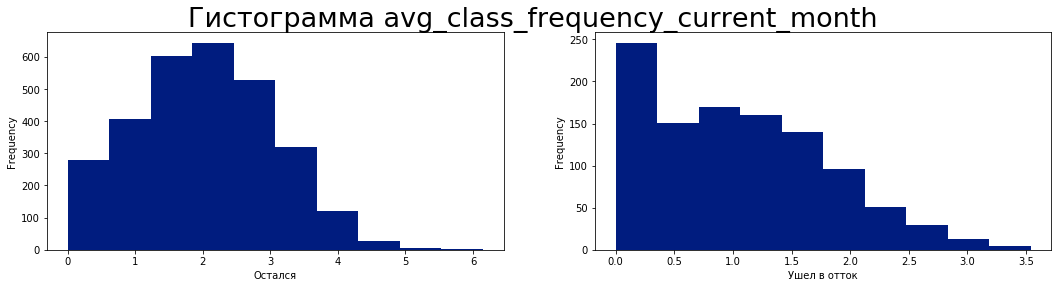

In [19]:
for column in columns:
    
    fig, axes = plt.subplots(1, 2, figsize = (18,4))
    plt.figtext(.5,.9,'Гистограмма ' + column, fontsize=27, ha='center')

    gym.query('churn == 0').plot(y=column, kind='hist',ax = axes[0], legend = False).set(xlabel = 'Остался')
    gym.query('churn == 1').plot(y=column, kind='hist',ax = axes[1], legend = False).set(xlabel = 'Ушел в отток')
    plt.show()

Анализ средних значений признаков и их распределения в разрезе групп пользователей "остался" и "попал в отток".  

Малая разница типичных значений групп:
- гендерная структура: структура обеих групп близка, прекращаю заниматься как мужчины, так и женщины;
- возрастная структура: разница среднего возраста пользователей в группах составляет 10% (3 года), в основном прекращают посещать фитнес-центр пользователи 25-30 лет;
- удаленность: разница средних показателей между группами невелика 12%, в группе оттока преобладают те, кто живет (работает) рядом с фитнес-центром.  

Средняя разница типичных значений групп:
- средняя частота посещений в неделю: пользователи из группы оттока ходят реже - в среднем 1,4 раза в неделю, активные пользователи - 2 раза в неделю, в группе оттока преобладают те, кто занимаетсе не более 2 раз в неделю;
- выручка от сопутствующих услуг: пользователи в группе оттока тратят на сопутствующие услуги фитнес-центра меньше активных пользователей - на 27%;

Высокая разница типичных значений групп:
- партнерская программа: в группе оттока меньше пользователей из партнерской программы на 33%, в основном перестают посещать фитнес-центр те, кто пришли самостоятельно;
- групповые занятия: в группе оттока пользователи в среднем на 42% реже посещают групповые занятия, в основном перестают посещать те, кто не ходит на групповые занятия;
- реферальная программа: в среднем пользователей, использовавших реферальный код, в группе оттока почти в два раза меньше; перестают посещать фитнес-центр в основном пользователи, пришедшие самостоятельно;
- срок до окончания абонемента: в группе оттока в среднем перестают посещать фитнес-центр за 1,6 месяца до окончания срока действия абонемента,  
- срок абонемента: в группе оттока средний срок действия абонемента 1,7 месяца, что на 70% меньше в сравнении с группой  активных пользователей - 5,7 месяца; в основном прекращают заниматься пользователи, купившие абонемент на 1 месяц;
- период с момента первого обращения: в группе оттока средний период взаимодействия с фитнес-центром - 1 месяц, это почти в 5 раз меньше в сравнении с группой существующих активных пользователей (4,7 месяца), уходят в основном пользователи с лайфтайм меньше месяца.



Построим и отобразим **матрицу корреляций**.

In [20]:
cm = gym.corr()

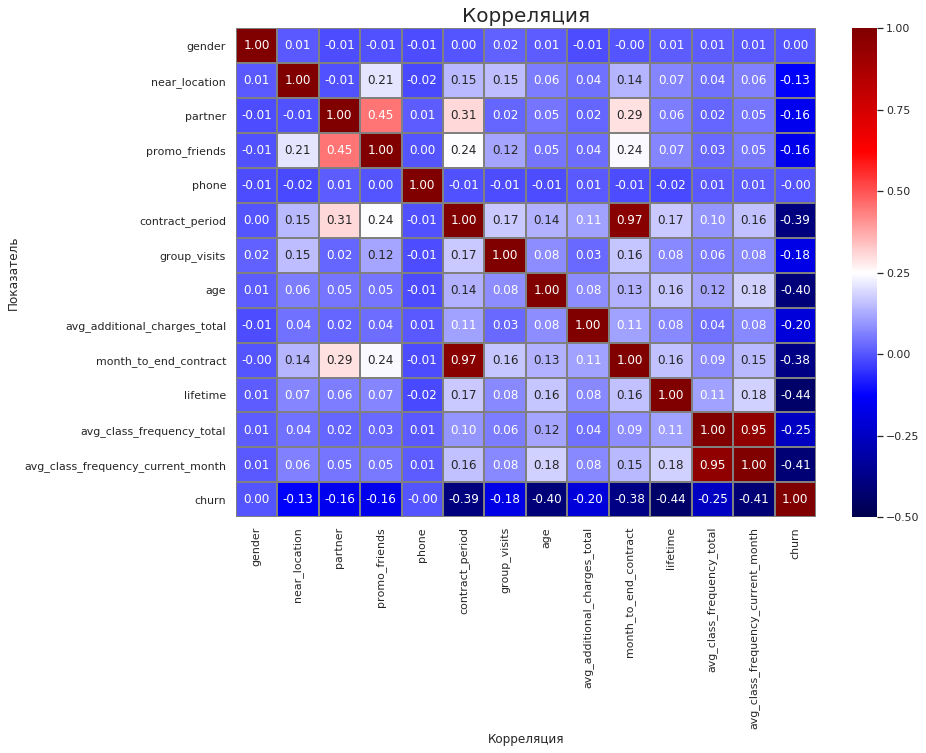

In [21]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Корреляция', fontsize=20)
ax = sns.heatmap(cm, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=-0.5, cmap = 'seismic')
#ax.set_yticklabels(retention_pivot.index.date)
ax.set_ylabel('Показатель')
ax.set_xlabel('Корреляция')
plt.show()

Признаки, коррелирующие с целевой переменной:
- лайфтайм (-0,44);
- средняя частота посещения фитнес-центра в текущем месяце (- 0,41);
- возраст (-0,40);
- срок абонемента (0,39);
- срок до окончания действующего абонемента (0,38)

Признаки, сильно коррелирующие между собой:
- срок абонемента и срок до окончания действующего абонемента (0,97);
- средняя частота посещения фитнес-центра и средняя частота посещения фитнес-центра в текущем месяце (0,95).

#### Вывод  
Предварительно на сокращение оттока можно повлиять за счет следующих признаков:  
1) партнерские программы и реферальные ссылки;  
2) групповые занятия;  
3) срок абонемента.  


## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов. Целевой признак — факт оттока клиента в следующем месяце.

В выборке есть 2 пары взаимозависимых признаков с высоким коэффициентом корреляции. Оставим только признаки, корреляция между которыми не превышает высокого порога (0.8).

In [22]:
gym_corr = gym.drop(['month_to_end_contract', 'avg_class_frequency_current_month'], axis = 1)

Разделим наши данные на признаки (матрица X) и целевую переменную (y).

In [23]:
X = gym_corr.drop('churn', axis = 1)
y = gym_corr['churn']

Разбиваем данные на обучающую и валидационную выборку

In [24]:
#разделим модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
# обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(
    X_train
)  
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке двумя способами:
- логистической регрессией,
- случайным лесом.

In [26]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(solver = 'lbfgs') 
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [27]:
# зададим алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100,random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Оценим метрики accuracy (доля правильных ответов), precision (точность) и recall (полнота) для обеих моделей на валидационной выборке. Сравним по ним модели. Посмотрим, какая модель показала себя лучше на основании метрик?

In [28]:
'''
Функция, которая рассчитывает метрики
'''

def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    #print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [29]:
print_all_metrics(y_test, lr_predictions, lr_probabilities, 'Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.81
	F1: 0.80
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.79
	Recall: 0.76
	F1: 0.77


### Вывод  
Получена модель по прогнозированию оттока клиентов на основе двух алгоритмов - логистическая регрессия и случайные лес.  

На основе метрик,которые берут в расчёт только итоговое спрогнозированное значение (0 или 1), лучше себя показывает модель, полученная логистической регрессией. Доля правильный ответов (Accuracy) - 0,9; доля правильных ответов среди целевого класса (Precision) - 0,79; полнота (Recall) - 0,81. Баланс между метриками F1 также лучше для логистической регрессии - 0,8. 

## Кластеризация клиентов

Проведем кластеризацию клиентов.

- Стандартизируем данные.

In [30]:
gym_cs = scaler.fit_transform(gym.drop('churn', axis = 1))

- Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика посмотрим, какое количество кластеров можно выделить. 

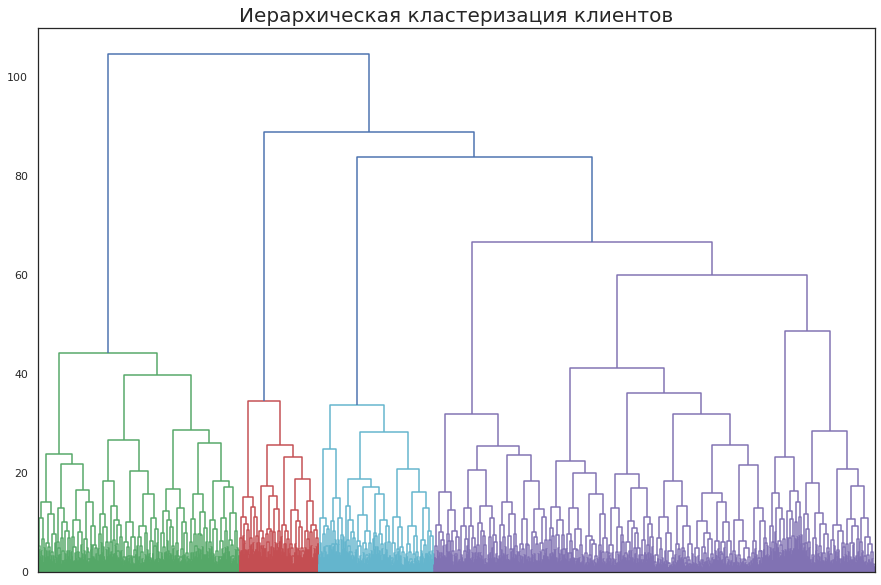

In [31]:
linked = linkage(gym_cs, method = 'ward')
plt.figure(figsize=(15, 10)) 
plt.title('Иерархическая кластеризация клиентов', fontsize=20)
dendrogram(linked, orientation='top', no_labels=True)
plt.show() 

Оптимальное число кластеров 5.

- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 

In [32]:
# задаём модель k_means с числом кластеров 5
km_model = KMeans(n_clusters = 5, random_state = 0) 

In [33]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km_model.fit_predict(gym_cs) 

In [34]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

- Оценим модель с помощью метрики силуэта (silhouette score).

In [35]:
silhouette_score(gym_cs, labels) 

0.14141242495809797

Значение метрики silhouette_score не очень высокое - требуется дополнительное обсуждение и оценка экспертами.

- Посмотрим на средние значения признаков для кластеров

In [36]:
# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby('cluster_km').mean().T

cluster_km,0,1,2,3,4
gender,0.50,0.52,0.50,0.49,0.56
near_location,0.96,0.86,0.00,1.00,0.98
partner,0.78,0.47,0.46,0.35,0.36
promo_friends,0.57,0.31,0.08,0.24,0.23
phone,1.00,0.00,1.00,1.00,1.00
contract_period,10.88,4.79,2.35,1.95,2.67
group_visits,0.54,0.43,0.22,0.34,0.47
age,29.98,29.30,28.48,28.17,30.13
avg_additional_charges_total,160.71,143.96,135.46,131.62,161.72
month_to_end_contract,9.95,4.48,2.20,1.86,2.46


Клиенты, попадающие в отток, сосредоточены в кластере 1,2,3. Самые стабильные клиенты в кластере 0, 4.

- Построим распределения признаков для кластеров.   

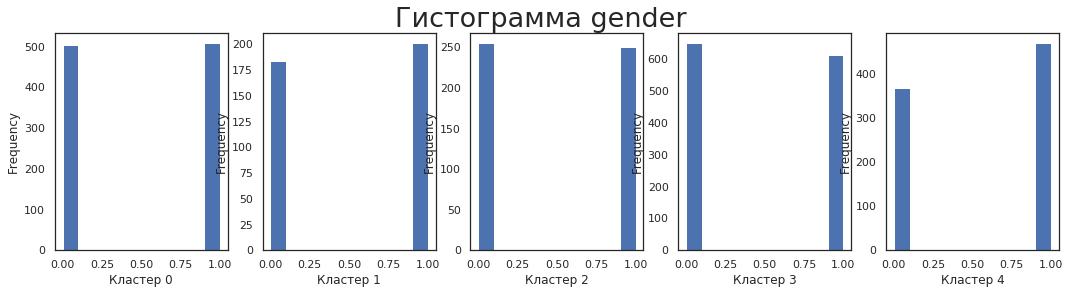

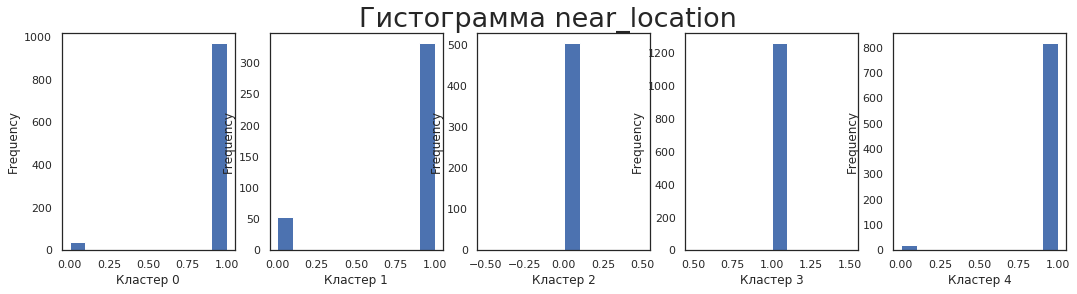

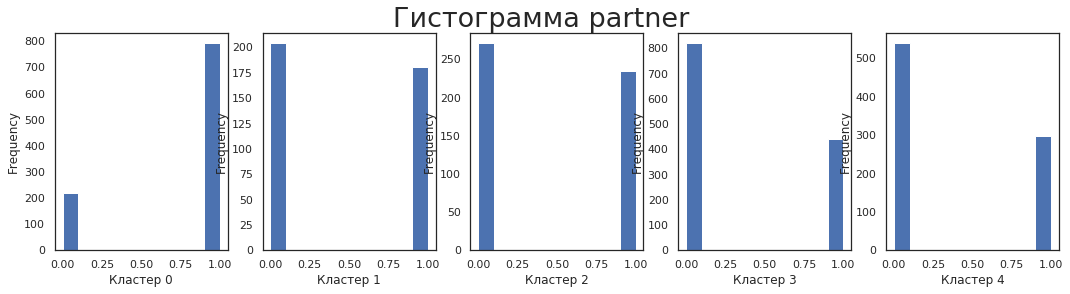

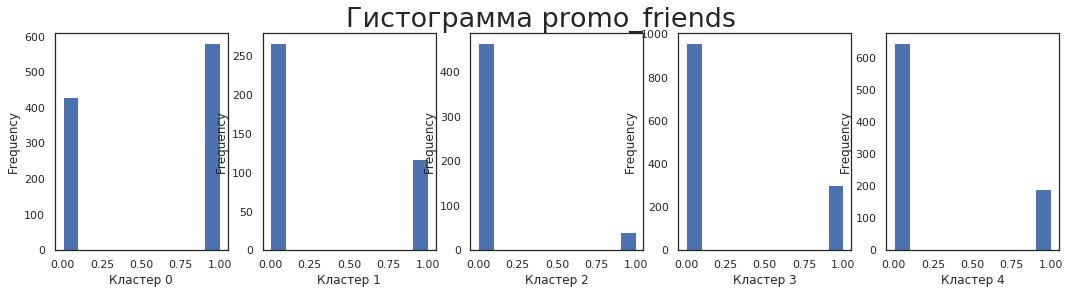

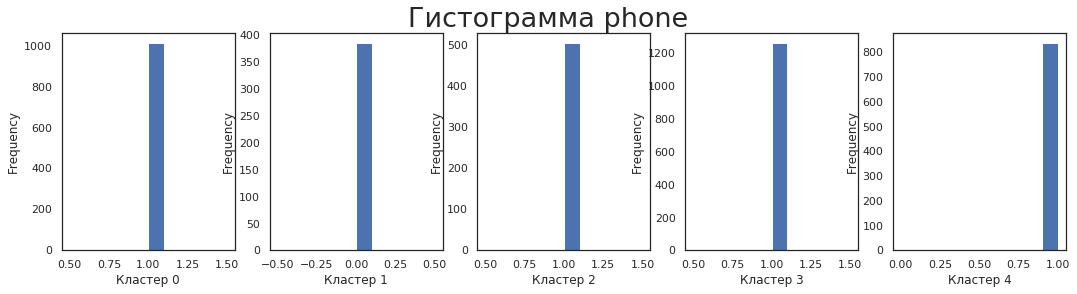

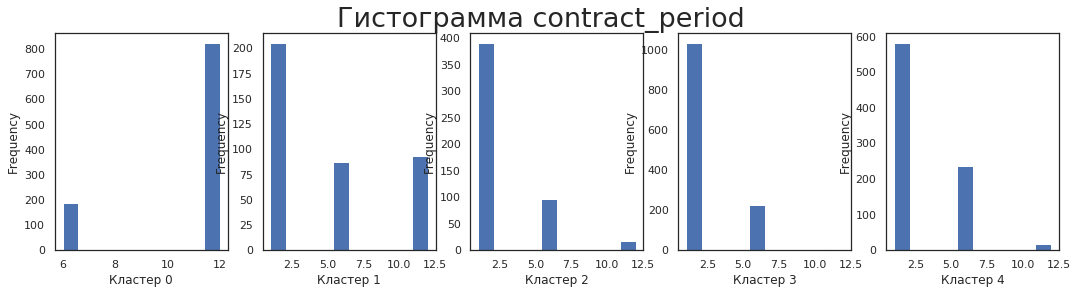

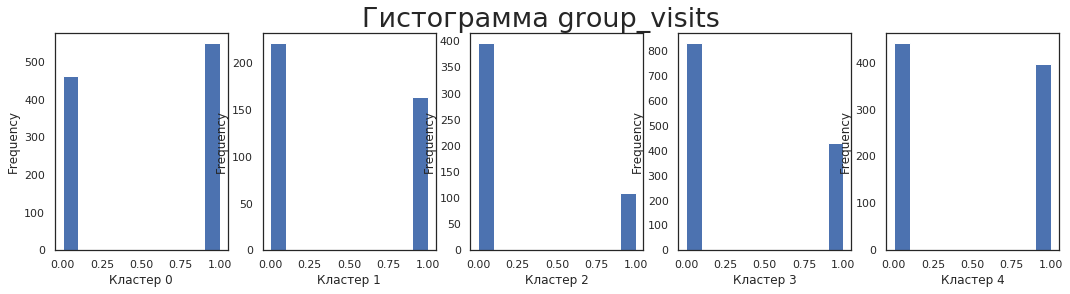

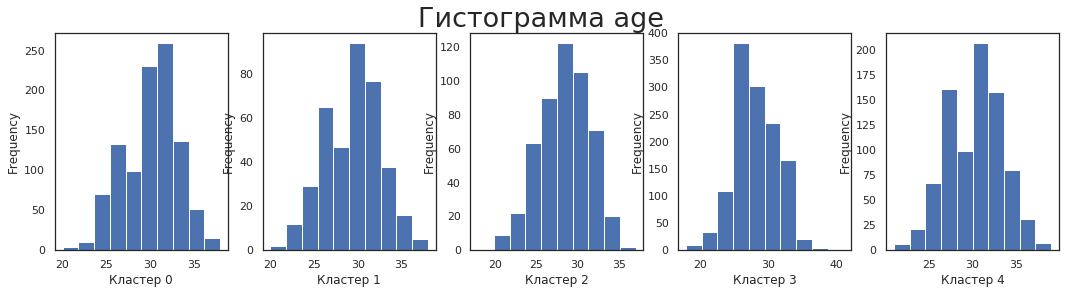

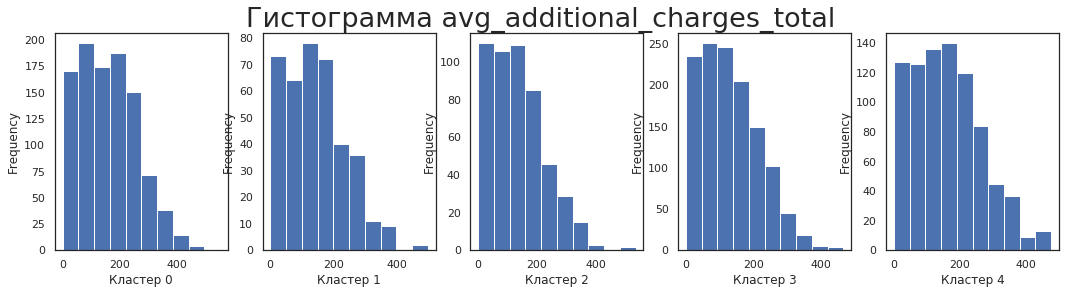

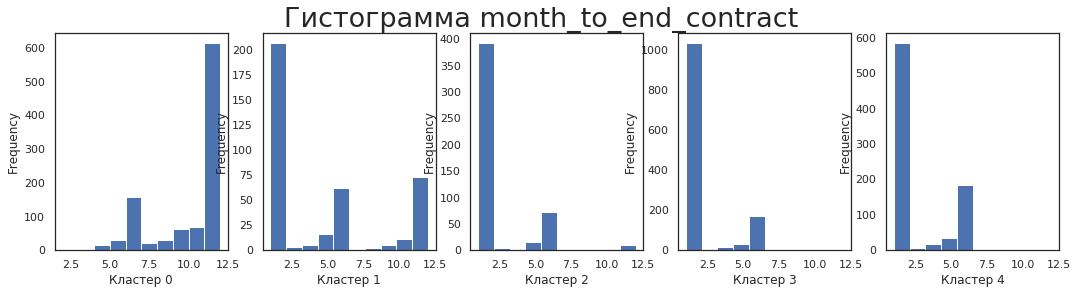

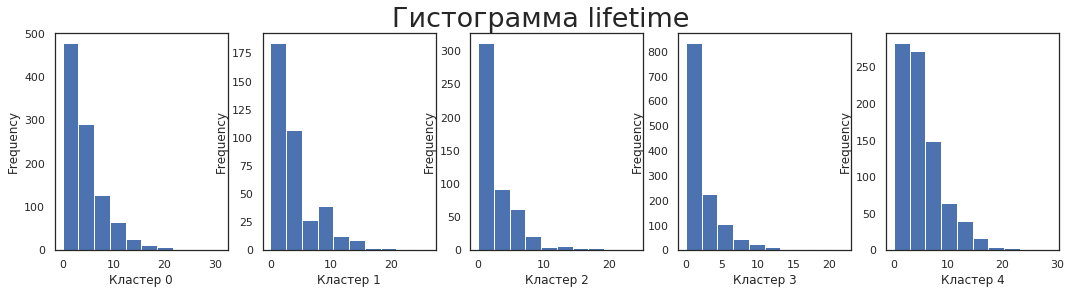

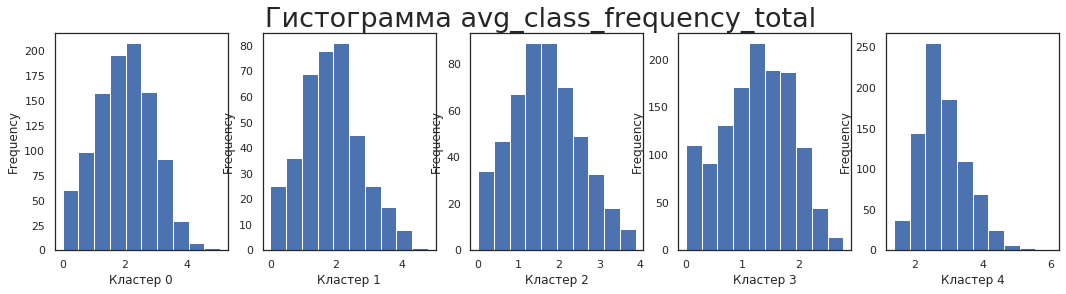

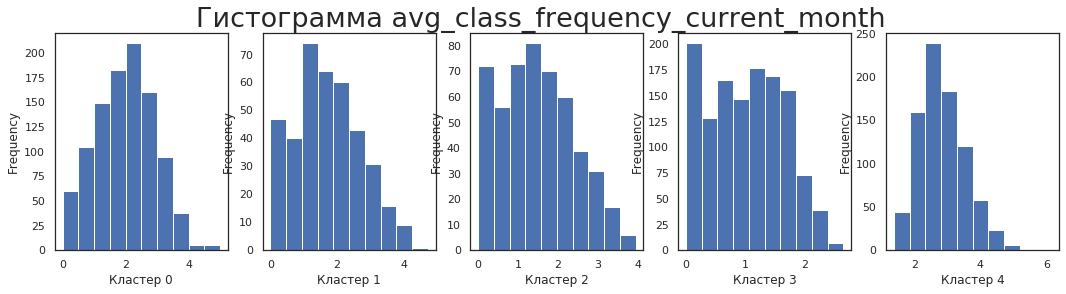

In [37]:
for column in columns:
    
    fig, axes = plt.subplots(1, 5, figsize = (18,4))
    plt.figtext(.5,.9,'Гистограмма ' + column, fontsize=27, ha='center')

    gym.query('cluster_km == 0').plot(y=column, kind='hist',ax = axes[0], legend = False).set(xlabel = 'Кластер 0')
    gym.query('cluster_km == 1').plot(y=column, kind='hist',ax = axes[1], legend = False).set(xlabel = 'Кластер 1')
    gym.query('cluster_km == 2').plot(y=column, kind='hist',ax = axes[2], legend = False).set(xlabel = 'Кластер 2')
    gym.query('cluster_km == 3').plot(y=column, kind='hist',ax = axes[3], legend = False).set(xlabel = 'Кластер 3')
    gym.query('cluster_km == 4').plot(y=column, kind='hist',ax = axes[4], legend = False).set(xlabel = 'Кластер 4')

    plt.show()

- Рассчитаем долю оттока для каждого полученного кластера. Посмотрим, отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?  

In [38]:
gym_cluster_churn = gym.groupby('cluster_km').agg({'churn': 'mean'}) \
                        .rename(columns={'churn' : 'churn_ratio'})\
                        .sort_values('churn_ratio', ascending = True)
display(gym_cluster_churn.style.format({'churn_ratio':"{0:.1%}"}))

,churn_ratio
cluster_km,
0,2.8%
4,6.8%
1,26.8%
2,44.4%
3,51.4%


### Вывод
Кластеры клиентов, полученные в результате алгоритма K-Means, отличаются по доле оттока. Минимальная доля оттока в кластере 0 (2,8%), максимальная - в кластере 3 - 51,4%.  

В кластере 0 с минимальным оттоком (3%) преобладают пользователи, пришедшие в рамках партнерской программы или акции "приведи друга", заключившие договор на длительный срок (преимущественно 1 год), активно посещающие групповые занятия. При этом пользователи живут/работают близко к фитнес-центру.  

В кластере 4 с вторым по значению оттоком (7%) преобладают постоянные клиенты - те, кто пришел в фитнес-центр в среднем 5 месяцев назад, месторасположение дома/работы - преимущественно рядом с фитнес-центром. Посещают занятия чаще пользователей других кластеров, тратят на сопутствующие услуги больше, по возрасту - старше пользователей других кластеров. Абонемент приобретают с периодом действия в среднем 2,5 месяца.

В кластере 1 с оттоком 27% в  базе данных нет телефонов пользователей, несмотря на средний период действия абонемента - почти 5 месяцев и лайфтайм - почти 4 месяца.

В кластере 2 с оттоком 44,4% пользователи проживают (работают) далеко от фитнес-центра. Клиенты с низкой посещаемостью групповых тренировок.  

В кластере 3 с максимальным оттоком (51,4%) пользователи имеют краткосрочные договоры с фитнес-центром.

## Общий вывод  
В рамках исследования сформирована модель бинарной классификации для прогнозирования оттока клиентов. Алгоритм с наилушим уровнем метрик полноты, точности - логистическая регрессия.   

В рамках кластеризации выделено 5 групп клиентов, для каждой из которых следует применять свою стратегию удержания и снижения оттока.  

**1 группа: уровень оттока минимальный - 3%**  
Наиболее лояльная группа клиентов - активно посещают групповые занятия, живут/работают недалеко от фитнес-центра, приобретают абонемент на длительный срок (1 год), пришли в рамках партнерских программ или акции "приведи друга".  
Стратегия - *удержание лояльности:*  
специальные условия, подарки, скидки.  

**2 группа: уровень оттока небольшой - 7%**  
Группа также относится к существующим активным клиентам, существенное отличие от предыдущей  - приобретают краткосрочные абонементы (2,5 месяца).      
Стратегия - *формирование долгосрочных взаимоотношений:*  
стимулировать приобретение долгосрочных абонементов - не менее 6 месяцев - за счет разнообразных бонусов - скидка в виде кэшбека (который можно потратить на дополнительные услуги, индивидуальные тренировки), дополнительные тренировки (значимые процедуры), скидка на иные услуги по выбору пользователя и т.д.  

**3 группа: уровень оттока 26,8%**  
Для этой группы в базе данных не заполнены контактная информация - телефоны. Клиенты не включены в информационное поле фитнес-клуба.  
Стратегия - *повышение информированности:*  
собрать и заполнить контактную информацию, включить номера телефонов в информационную рассылку с предложениями клуба. 

**4 группа: уровень оттока 44,4%**  
Для клиентов данной группы характерна удаленность местоположения (дом/работа) и низкая посещаемость групповых тренировок.  
Стратегия: *формирование социальных связей*:    
привлечение клиентов на групповые занятия за счет различных стимулирующих мероприятий.

**5 группа: уровень оттока максимальный 51,4%**  
Клиенты данной группы приобретают краткосрочные абонементы.   
Стратегия: *формирование долгосрочных взаимоотношений*  
стимулировать приобретение долгосрочных абонементов - не менее 6 месяцев - за счет разнообразных бонусов - скидка в виде кэшбека (который можно потратить на дополнительные услуги, индивидуальные тренировки), дополнительные тренировки (значимые процедуры), скидка на иные услуги по выбору пользователя и т.д.  

**Мероприятия, актуальные для всех групп:**    
партнерские программы и реферальные ссылки - активнее продвигать привлечение по данным программам, физилица - пересмотреть бонусы для "друга", юрлица - сформировать базу данных предприятий, находящихся в зоне "притяжения", выйти с предложениями для сотрудников.  
